In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [2]:
trending_topic_content=['Altcoin', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'Appl', 'Goog', 'Yhoo']
date_ranges = ['2023-02-01','2023-02-02', '2023-02-03','2023-02-04', '2023-02-05','2023-02-06', '2023-02-07']
columns=['Date', 'ID', 'username', 'tweet']
df_dict = {}
for i in trending_topic_content:
    df_dict[i] = pd.DataFrame(columns=columns)
    for j in date_ranges:
        df_dict[i] = pd.concat([df_dict[i], pd.read_csv(f'./{i}{j}.csv')], ignore_index=False)

In [3]:
df_dict['Bitcoin']

,Date,ID,username,tweet
0,2023-02-01 23:59:48+00:00,1620934975737692161,NigBtcCommunity,@LukeMikic21 @Bitwage The main reason here is ...
1,2023-02-01 23:59:42+00:00,1620934952870367233,lefteye1717,If you wanna be rich buy #bitcoin
2,2023-02-01 23:59:34+00:00,1620934919336890368,TheHEXiestMan,Excited to see the power of the T-Share in act...
3,2023-02-01 23:59:34+00:00,1620934918607081472,BitcoinCarl_,"I regularly remind my friends to buy #Bitcoin,..."
4,2023-02-01 23:59:32+00:00,1620934908083589121,McCoy_2106,@LukeDashjr @Baltics_HODL Doesn’t seem like mu...
...,...,...,...,...
1995,2023-02-07 20:59:45+00:00,1623063993962098690,StackerNewsFeed,1/2 of all Bitcoin has not moved in 2 years!\n...
1996,2023-02-07 20:59:44+00:00,1623063990120378371,BEARBULLWHALE,"🐻 BEARWHALE! just SHORTED $4,864,932 worth of ..."
1997,2023-02-07 20:59:44+00:00,1623063989474193420,StackerNewsFeed,The Fed's Immaculate Disinflation | Mark Thorn...
1998,2023-02-07 20:59:43+00:00,1623063985758130177,StackerNewsFeed,Lucent Labs | Defining BitOps\n\nComments: htt...


In [4]:
for i in trending_topic_content:
    df_dict[i].drop_duplicates(subset=['Date', 'ID', 'username', 'tweet'])

In [5]:
for i in trending_topic_content:
    df_dict[i] = df_dict[i].assign(keyword=i)

In [6]:
df_dict['Altcoin'].head()

,Date,ID,username,tweet,keyword
0,2023-02-01 23:59:04+00:00,1620934790836019200,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.1...,Altcoin
1,2023-02-01 23:59:04+00:00,1620934790584352768,ruhul180,The treasury will also be used to fund new Red...,Altcoin
2,2023-02-01 23:59:00+00:00,1620934773438042114,BigEyesCoin,🙀ONLY 48 HOURS LEFT TO CLAIM YOUR 200% BONUS O...,Altcoin
3,2023-02-01 23:57:02+00:00,1620934281009987584,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.0...,Altcoin
4,2023-02-01 23:55:35+00:00,1620933913680945152,cryptoalerted,IAGON (IAG) went up 17.7 percent in the last 1...,Altcoin


In [7]:
columns.append('keyword')
df = pd.DataFrame(columns=columns)
for i in trending_topic_content:
    df = pd.concat([df, df_dict[i]], ignore_index=False)

In [8]:
df.head()

,Date,ID,username,tweet,keyword
0,2023-02-01 23:59:04+00:00,1620934790836019200,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.1...,Altcoin
1,2023-02-01 23:59:04+00:00,1620934790584352768,ruhul180,The treasury will also be used to fund new Red...,Altcoin
2,2023-02-01 23:59:00+00:00,1620934773438042114,BigEyesCoin,🙀ONLY 48 HOURS LEFT TO CLAIM YOUR 200% BONUS O...,Altcoin
3,2023-02-01 23:57:02+00:00,1620934281009987584,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.0...,Altcoin
4,2023-02-01 23:55:35+00:00,1620933913680945152,cryptoalerted,IAGON (IAG) went up 17.7 percent in the last 1...,Altcoin


#### Preprocessing Data

In [9]:
# Removing Numbers From "Tweet" Column
df['tweet'] =  [re.sub(r'\d+','', str(x)) for x in df['tweet']]

# Removing Punctuations From "Tweet" Column
df["tweet"] = df['tweet'].str.replace('[^\w\s]','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13284\964674679.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["tweet"] = df['tweet'].str.replace('[^\w\s]','')


In [10]:
# Removing Words In Tweets With Length Less Than 2
pat = re.compile(r'\b\w{1,2}\b')
df["tweet"] = df["tweet"].apply(lambda s: pat.sub('', s))

In [11]:
df.head()

,Date,ID,username,tweet,keyword
0,2023-02-01 23:59:04+00:00,1620934790836019200,BNB_Tracker,BinanceCoin price update BNB\n\nBNB USD\n\nBi...,Altcoin
1,2023-02-01 23:59:04+00:00,1620934790584352768,ruhul180,The treasury will also used fund new Red Fal...,Altcoin
2,2023-02-01 23:59:00+00:00,1620934773438042114,BigEyesCoin,ONLY HOURS LEFT CLAIM YOUR BONUS YOUR BIG ...,Altcoin
3,2023-02-01 23:57:02+00:00,1620934281009987584,BNB_Tracker,BinanceCoin price update BNB\n\nBNB USD\n\nBi...,Altcoin
4,2023-02-01 23:55:35+00:00,1620933913680945152,cryptoalerted,IAGON IAG went percent the last minutes h...,Altcoin


In [12]:
df.shape

(54825, 5)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df['Date'] = df['Date'].dt.date
df.head()

,Date,ID,username,tweet,keyword
0,2023-02-01,1620934790836019200,BNB_Tracker,BinanceCoin price update BNB\n\nBNB USD\n\nBi...,Altcoin
1,2023-02-01,1620934790584352768,ruhul180,The treasury will also used fund new Red Fal...,Altcoin
2,2023-02-01,1620934773438042114,BigEyesCoin,ONLY HOURS LEFT CLAIM YOUR BONUS YOUR BIG ...,Altcoin
3,2023-02-01,1620934281009987584,BNB_Tracker,BinanceCoin price update BNB\n\nBNB USD\n\nBi...,Altcoin
4,2023-02-01,1620933913680945152,cryptoalerted,IAGON IAG went percent the last minutes h...,Altcoin


In [15]:
# To check for duplicate dates by same dates and usernames
s = df.groupby(['Date','username']).tweet.value_counts().to_frame('Counts')
s

Counts
Date       username        tweet                                                     
2023-02-01 007radiotv       New Podcast Top  Price Prediction Bitcoin Ethe...       1
           07caVv           have joined this extraordinary project  will w...       1
                           Professional team with  good idea The project  ...       1
           0x5olus         Earn upto  USDC weekly Signup  join the waitlis...       1
           0xCMO_Bro       michaeljburry burries his account \n\nWish some...       1
...                                                                               ...
2023-02-07 zmeu197         What happens  the ETH Turn  the gas httpstcoKfv...       1
           zndtoshi        Imo many ethereans just wanted  excuse  come ba...       1
           zode_jay        God bless you sir Your games are real and trust...       2
           zoepark69038759 ltltSwipe  know\n\nTodays IMPORTANT DATA \nWant...       1
           zycrypto        Bitcoins Fear and Greed Index Stays  Greed Zone...       1

[43236 rows x 1 columns]

In [16]:
# Number of tweets that we have for each Date
s=df.groupby('Date')['ID'].count()
s

Date
2023-02-01    8040
2023-02-02    8119
2023-02-03    8078
2023-02-04    7249
2023-02-05    7255
2023-02-06    8046
2023-02-07    8038
Name: ID, dtype: int64

In [17]:
print(df.groupby('username').count())


                Date  ID  tweet  keyword
username                                
007radiotv         7   7      7        7
07caVv            10  10     10       10
0FajarPurnama0     1   1      1        1
0I_shubham12       1   1      1        1
0ZeroAuthority     1   1      1        1
...              ...  ..    ...      ...
zuee96856171       1   1      1        1
zulm48386504       1   1      1        1
zycrypto           1   1      1        1
zzaries2299        1   1      1        1
zzz_hamed          2   2      2        2

[14335 rows x 4 columns]


In [18]:
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='Date'>

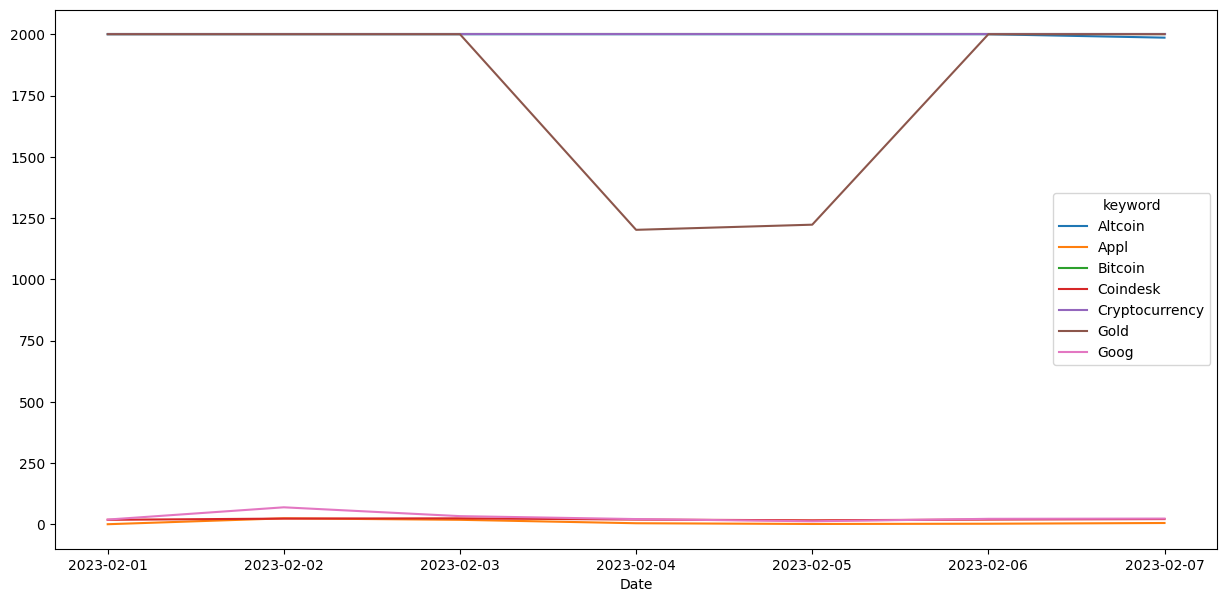

In [19]:

fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['Date','keyword'])['keyword'].count().unstack().plot(ax=ax)


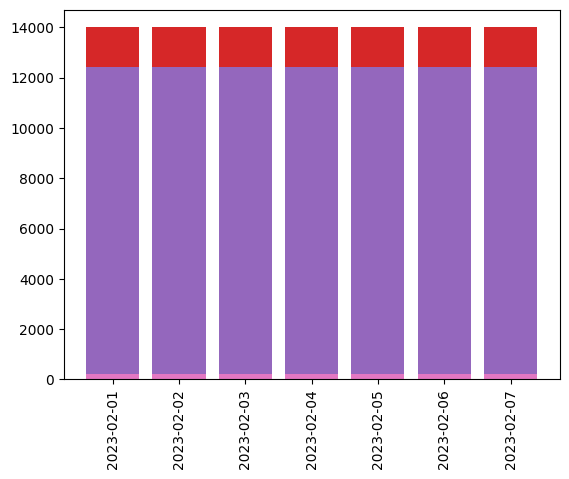

In [20]:
a = pd.DataFrame(df.groupby(['Date','keyword'])['keyword'].count())
for i in trending_topic_content:
    b = df[df.keyword == i]
    plt.bar(b.Date, b.shape[0], label=i)
plt.legend = True
plt.xticks(rotation=90)
plt.show()

In [21]:
a = pd.DataFrame(df.groupby(['Date','keyword'])['keyword'].count())
a.columns = ['Count']
a.reset_index(inplace=True)

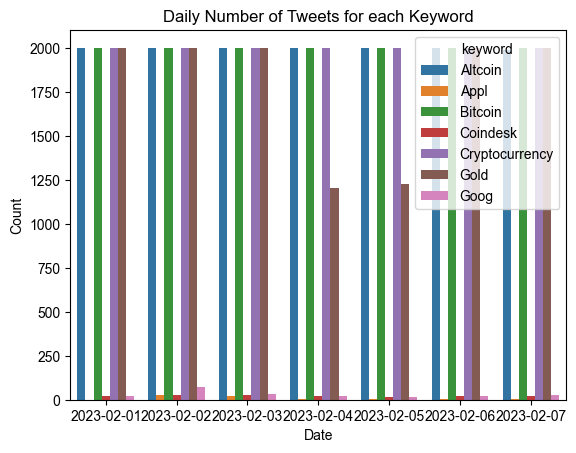

In [22]:
sns.barplot(x="Date", y=a.Count, hue="keyword", data=a)
plt.title('Daily Number of Tweets for each Keyword')
sns.set(rc={'figure.figsize':(20,8.27)})
plt.legend = True
plt.show()

In [23]:
a = pd.DataFrame(df.groupby(['Date','keyword', 'username'])['username'].count())
a.columns = ['Count']
a.reset_index(inplace=True)

In [24]:
b = pd.DataFrame(a.groupby(['Date', 'keyword'])['username'].count())
b.columns = ['Count']
b.reset_index(inplace=True)
b = b[b['keyword'] != 'Appl']

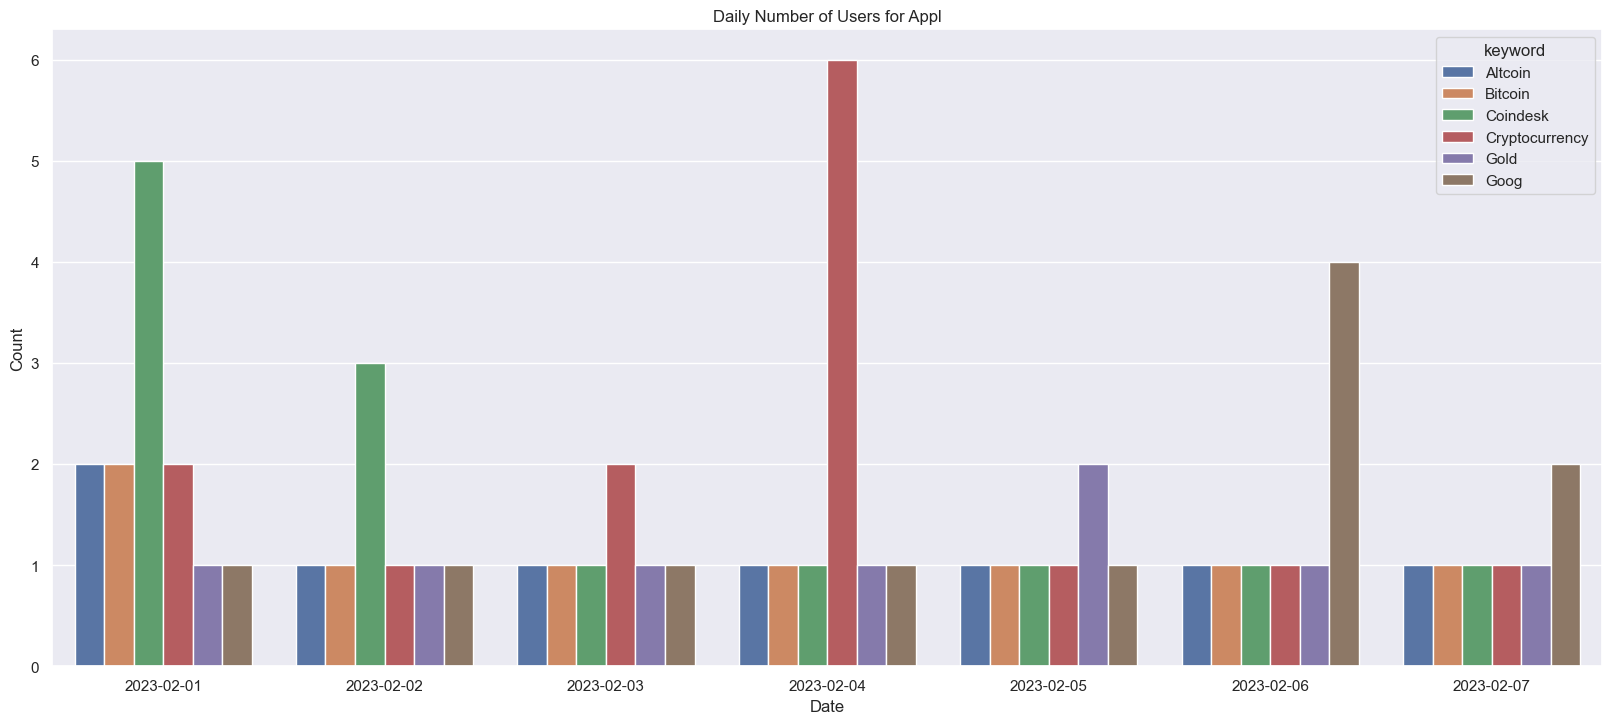

In [25]:
sns.barplot(x="Date", y=a.Count, hue="keyword", data=b)
plt.title('Daily Number of Users for Appl')
sns.set(rc={'figure.figsize':(20,8.27)})
plt.legend = True
plt.show()

In [26]:
b = pd.DataFrame(a.groupby(['Date', 'keyword'])['username'].count())
b.columns = ['Count']
b.reset_index(inplace=True)
b = b[b['keyword'] == 'Appl']

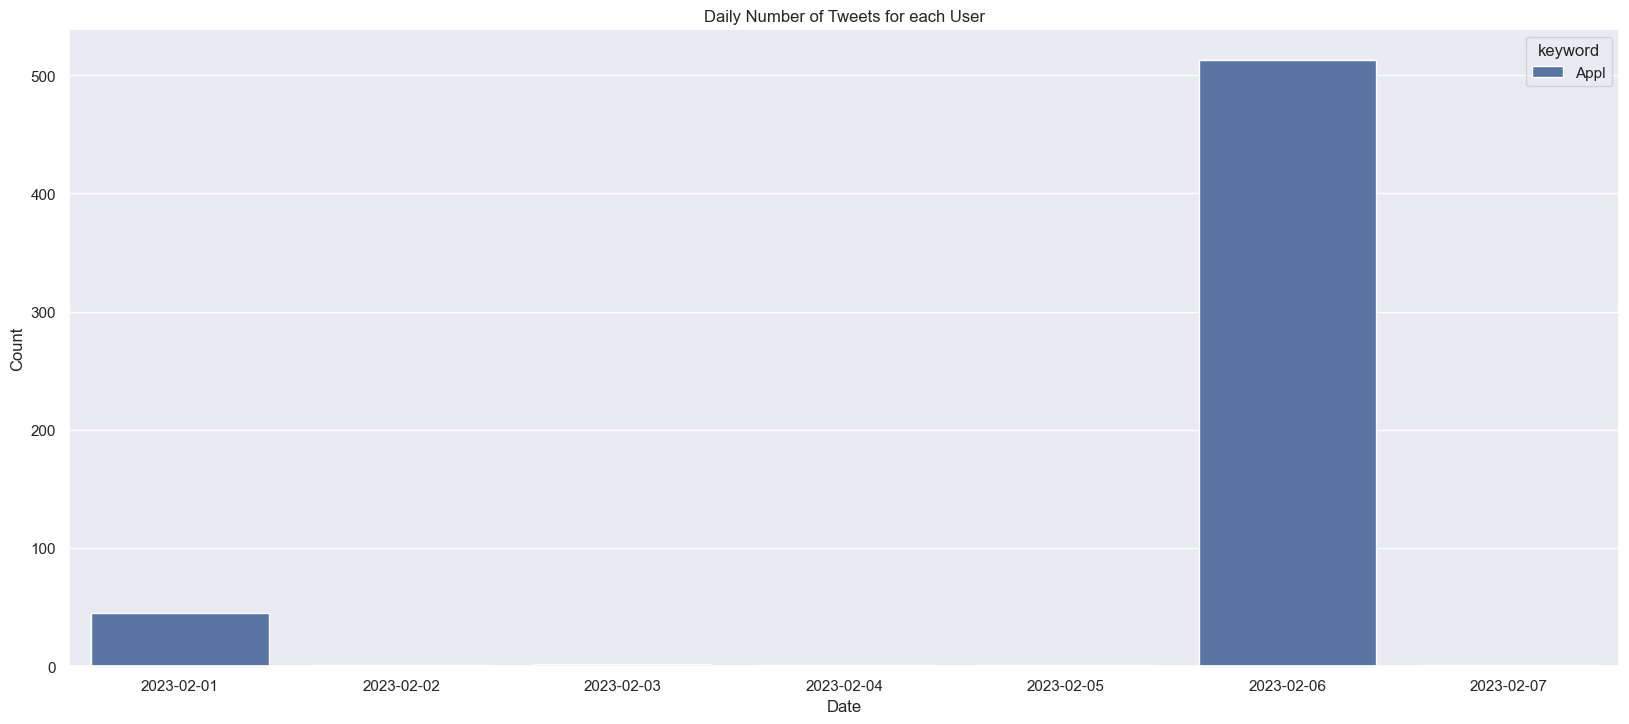

In [27]:
sns.barplot(x="Date", y=a.Count, hue="keyword", data=b)
plt.title('Daily Number of Tweets for each User')
sns.set(rc={'figure.figsize':(20,8.27)})
plt.legend = True
plt.show()

In [28]:
a.groupby(['keyword'])['Count'].sum()

keyword
Altcoin           13986
Appl                 61
Bitcoin           14000
Coindesk            147
Cryptocurrency    14000
Gold              12425
Goog                206
Name: Count, dtype: int64

In [29]:
df.groupby(['Date','keyword'])['keyword'].count()

Date        keyword       
2023-02-01  Altcoin           2000
            Appl                 1
            Bitcoin           2000
            Coindesk            19
            Cryptocurrency    2000
            Gold              2000
            Goog                20
2023-02-02  Altcoin           2000
            Appl                25
            Bitcoin           2000
            Coindesk            24
            Cryptocurrency    2000
            Gold              2000
            Goog                70
2023-02-03  Altcoin           2000
            Appl                19
            Bitcoin           2000
            Coindesk            25
            Cryptocurrency    2000
            Gold              2000
            Goog                34
2023-02-04  Altcoin           2000
            Appl                 5
            Bitcoin           2000
            Coindesk            20
            Cryptocurrency    2000
            Gold              1202
            Goog            

In [30]:
# Finding User with the max tweets
df.groupby(["username"])['username'].count().sort_values().tail(1)

username
BNB_Tracker    4737
Name: username, dtype: int64

In [31]:
BNB_Tracker_df = df[df.username == 'BNB_Tracker']

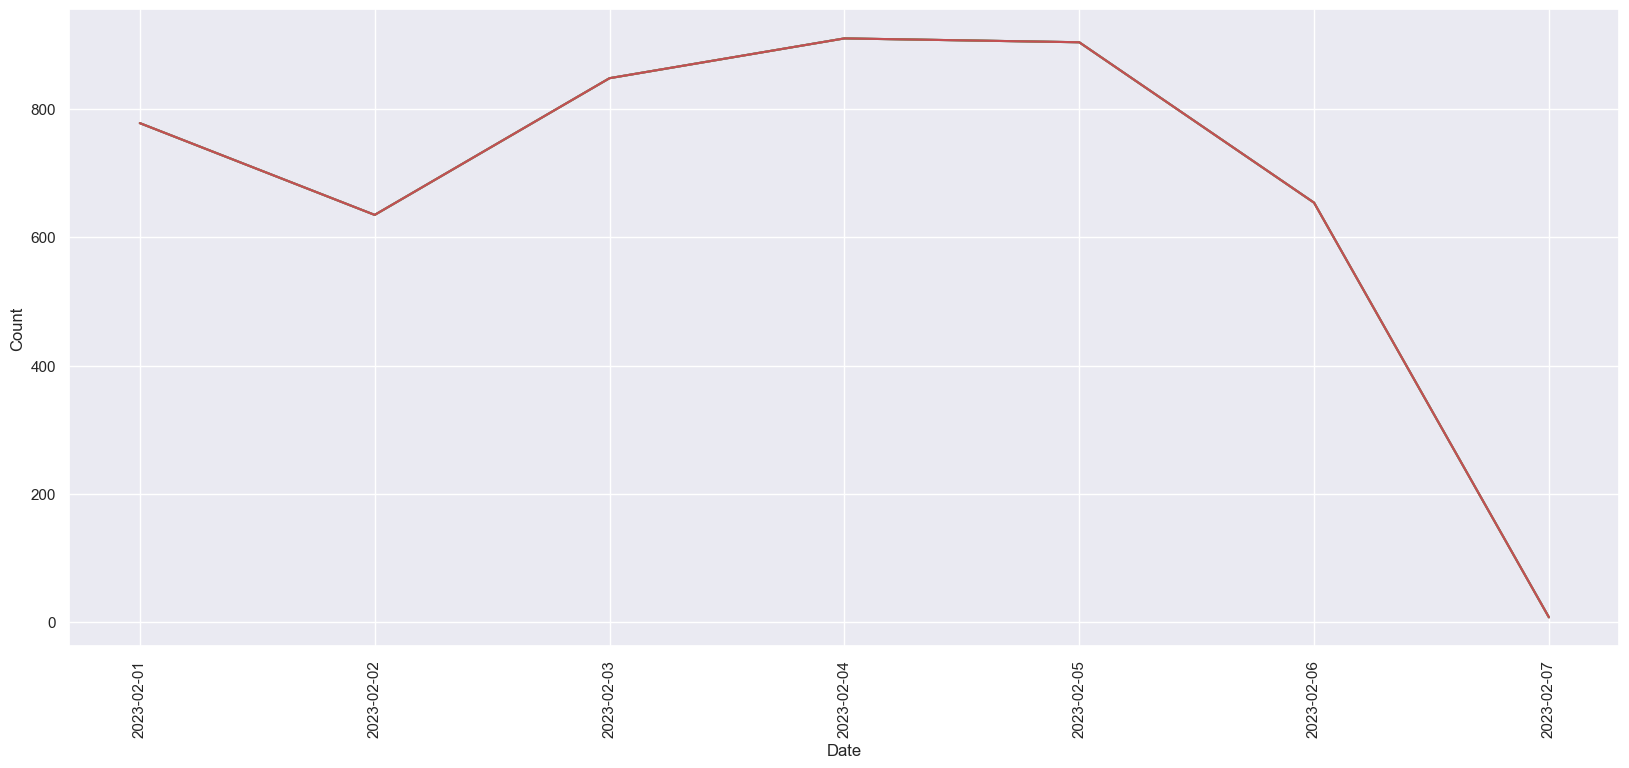

In [32]:
# Plotting number of tweets of user with max tweets datewise
BNB_Tracker_df.groupby('Date').count().plot(legend=False)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [33]:
a = BNB_Tracker_df.groupby('Date').count()
a.reset_index(inplace=True)
# a.head()
plt.bar(a.Date, a.Count)
plt.title('Title')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Count'

In [ ]:
a = pd.DataFrame(BNB_Tracker_df.groupby('keyword')['keyword'].count())
# a.reset_index()
plt.bar(a.index, a.keyword)
plt.title('Keyword Frequency')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()

In [ ]:
a = pd.DataFrame(df.groupby(["username"])['username'].count().sort_values().tail(10))
a.columns = ['Count']
a.reset_index()

In [ ]:
a = pd.DataFrame(df.groupby(['keyword'])['username'].count())
a.head()

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

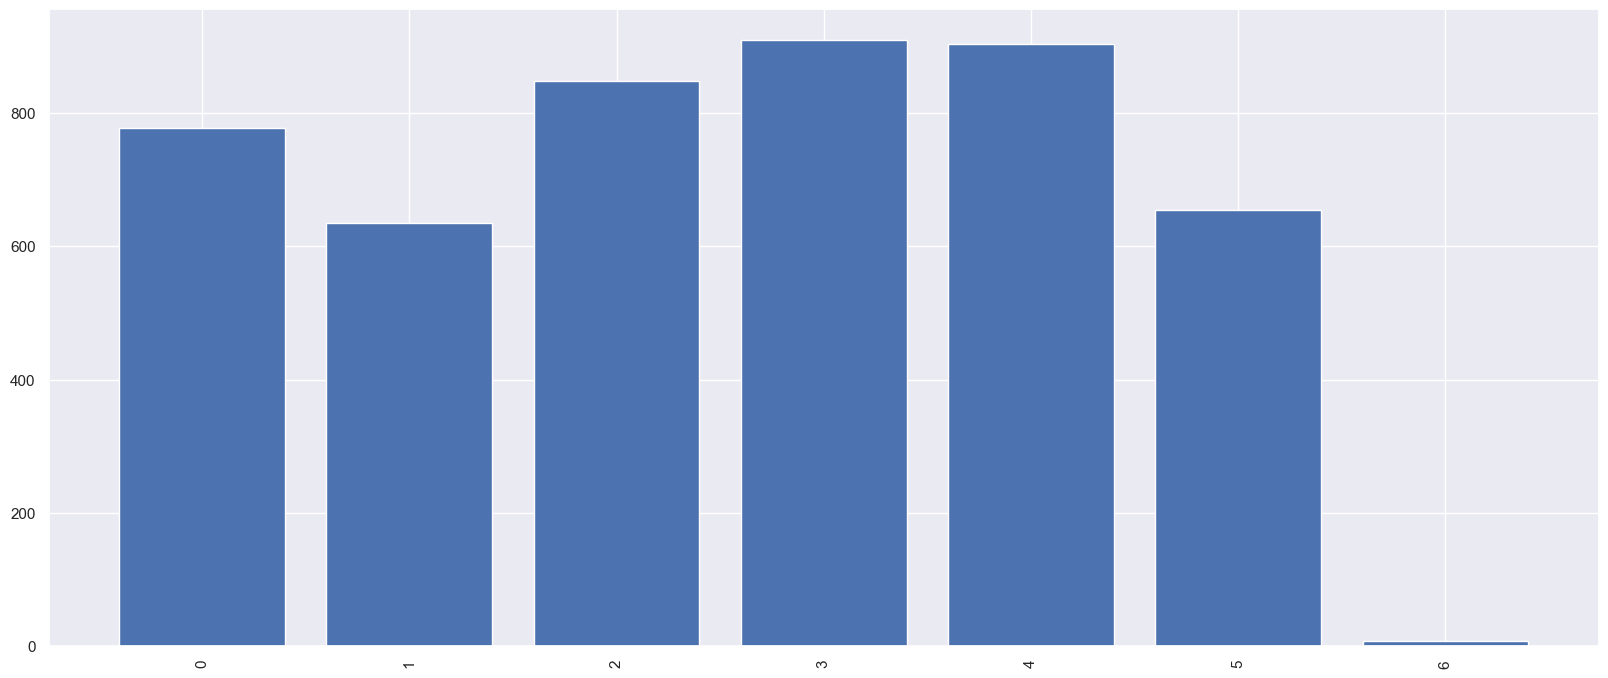

In [34]:
plt.bar(a.index, a.username)
plt.xticks(rotation=90)